In [18]:
SEED = 42

import os
os.environ['PYTHONHASHSEED']=str(SEED)

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import cv2
import math
import glob
from PIL import Image
from collections import Counter

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from keras.layers import *
from keras.models import *
import keras

In [19]:
resnet_weights_path = 'C:\\Users\\AAYUSH\\Desktop\\resnet\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [20]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Calculate padding needed to make the image square
    pad_horiz = max(0, (height - width) // 2)

    # Add padding to the sides
    img = cv2.copyMakeBorder(img, 0, 0, pad_horiz, pad_horiz, cv2.BORDER_CONSTANT, value=[255, 255, 255])

    # Resize to 224x224
    img = cv2.resize(img, (image_size, image_size))

    return img

In [24]:
for filename in os.listdir("C:\\Users\\AAYUSH\\Desktop\\test"):
    image_path = os.path.join("C:\\Users\\AAYUSH\\Desktop\\test", filename)
    print(image_path)

C:\Users\AAYUSH\Desktop\test\0002_c1s1_000451_03.jpg
C:\Users\AAYUSH\Desktop\test\0006_c5s3_076087_03.jpg
C:\Users\AAYUSH\Desktop\test\1490_c3s3_074344_04.jpg
C:\Users\AAYUSH\Desktop\test\1492_c1s6_013246_01.jpg
C:\Users\AAYUSH\Desktop\test\1498_c1s6_013646_03.jpg


In [27]:
image_size = 224

In [ ]:
processed_image = preprocess_image('C:\\Users\\AAYUSH\\Desktop\\test\\0002_c1s1_000451_03.jpg')

In [28]:
processed_image = preprocess_image('C:\\Users\\AAYUSH\\Desktop\\test\\0002_c1s1_000451_03.jpg')

In [29]:
processed_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

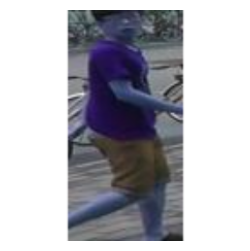

In [30]:
import matplotlib.pyplot as plt

# Function to display photos
def display_photos(images):
    plt.figure(figsize=(15, 3))
    plt.imshow(images)
    plt.axis('off')
    plt.show()

# Display 10 photos from the dataset
display_photos(processed_image)

In [31]:
from keras.applications import VGG16

In [32]:
img_width, img_height = 224, 224

In [33]:
# Instantiate convolutional base

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Show architecture
conv_base.summary()



58889256/58889256 [==============================] - 333s 6us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [51]:
feature_list = []
base_path = "C:\\Users\\AAYUSH\\Desktop\\New folder\\male"
for image in os.listdir(base_path):
    full_path = os.path.join(base_path, image)
    processed_image = preprocess_image(full_path)
    features = np.zeros(shape=(1, 7, 7, 512))
    processed_image = processed_image.reshape(-1, 224, 224, 3)
    image_features = conv_base.predict(processed_image)
    feature_list.append(image_features)

1/1 [==============================] - 0s 157ms/step


In [54]:
len(feature_list)

14883

In [57]:
feature_list_2 = []
base_path = "C:\\Users\\AAYUSH\\Desktop\\New folder\\female"
for image in os.listdir(base_path):
    full_path = os.path.join(base_path, image)
    processed_image = preprocess_image(full_path)
    features = np.zeros(shape=(1, 7, 7, 512))
    processed_image = processed_image.reshape(-1, 224, 224, 3)
    image_features = conv_base.predict(processed_image)
    feature_list.append(image_features)

1/1 [==============================] - 0s 188ms/step


In [55]:
features_male = np.array(feature_list)

In [56]:
features_male

array([[[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  5.491886 ],
          ...,
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ]],

         [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  9.490986 ,
            0.       , 30.021435 ],
          ...,
          [ 0.       ,  0.       ,  0.       , ..., 17.519217 ,
    

In [37]:
processed_image = processed_image.reshape(-1, 224, 224, 3)"C:\Users\AAYUSH\Desktop\New folder\male"

In [38]:
image_features = conv_base.predict(processed_image)

1/1 [==============================] - 0s 369ms/step


In [45]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features_shape = (sample_count,) + conv_base.output_shape[1:]
    features = np.zeros(shape=features_shape)  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    

In [46]:
train_features, train_labels = extract_features("C:\\Users\\AAYUSH\\Desktop\\New folder", 1000)

Found 25983 images belonging to 2 classes.
1/1 [==============================] - 3s 3s/step


ValueError: could not broadcast input array from shape (32,7,7,512) into shape (8,7,7,512)

In [ ]:
train_features, train_labels = extract_features(train_dir, 14034)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(valid_dir, 3000)
# test_features, test_labels = extract_features(test_dir, test_size)